# 5. 데이터 전처리 응용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv', nrows=10000)

In [3]:
df.shape

(10000, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# check data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
# numeric features
numeric_features = ['step', 'amount',
                    'oldbalanceOrg', 'newbalanceOrig',
                    'oldbalanceDest', 'newbalanceDest']

# categorical features
categorical_features = ['type', 'nameOrig', 'nameDest']

### Missing data 체크

In [7]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df = df.dropna()

### Correlation

In [10]:
# Correlation between x and y
y_column = 'isFraud'
x_column = 'type'
df['isFraud'].mean() # -> 0.13%

0.0068

In [11]:
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

isFraud,0,1
type,,
CASH_IN,0.196234,0.000000
CASH_OUT,0.129480,0.514706
DEBIT,0.034636,0.000000
PAYMENT,0.550242,0.000000
TRANSFER,0.089408,0.485294


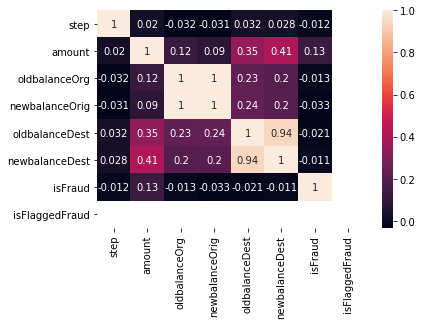

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
# sn.set(rc = {'figure.figsize':(15,15)})
plt.show()

### Histogram

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,4.178900,1.035467e+05,8.939330e+05,9.152741e+05,9.342758e+05,1.096606e+06,0.006800,0.0
std,2.479821,2.663072e+05,2.135683e+06,2.181428e+06,2.676340e+06,3.014496e+06,0.082185,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397530e+03,1.276875e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.285874e+04,2.137556e+04,1.034994e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.143825e+05,1.782719e+05,1.760934e+05,2.831067e+05,2.520552e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


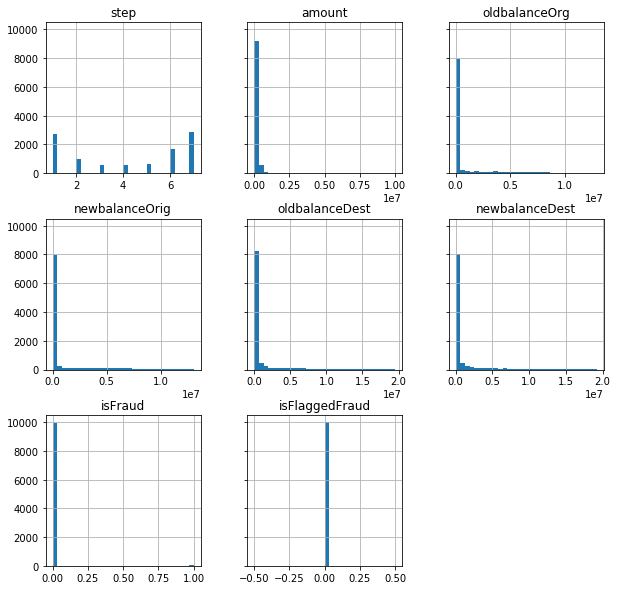

In [13]:
# Histograms for each numeric features
display(df.describe())
hist = df.hist(bins=30, sharey=True, figsize=(10, 10))

### 타겟변수 값별 히스토그램

step


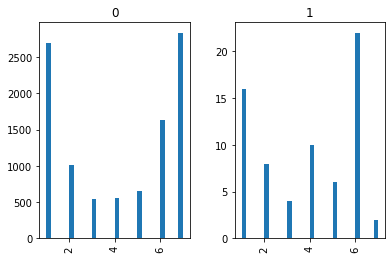

amount


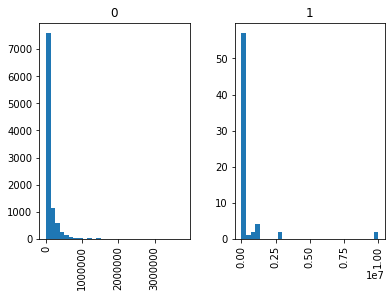

oldbalanceOrg


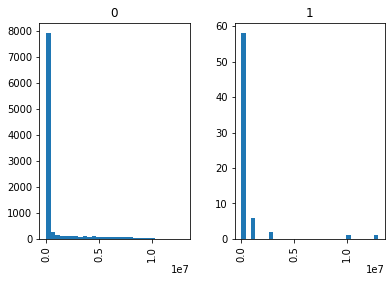

newbalanceOrig


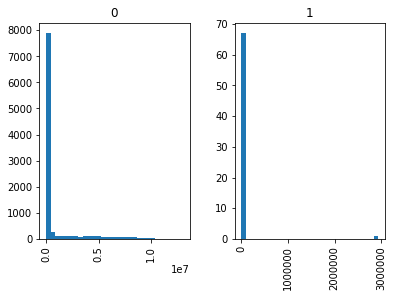

oldbalanceDest


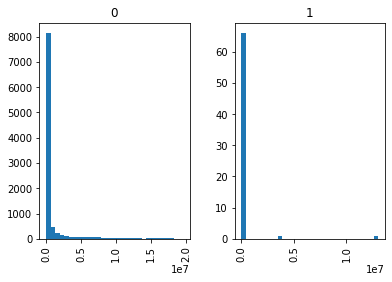

newbalanceDest


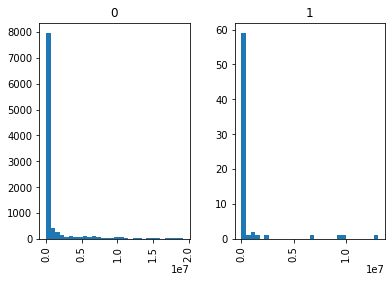

In [14]:
# Histogram
for column in df[numeric_features].columns:    
    print(column)
    hist = df[column].hist(by=df[y_column], bins=30)
    plt.show()

### Scaler

In [15]:
# numeric feature: scaling
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(df[numeric_features])

In [16]:
transformed_data

array([[0.00000000e+00, 9.83725235e-04, 1.31578108e-02, 1.23205354e-02,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.86189044e-04, 1.64333429e-03, 1.48992859e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.78610043e-05, 1.39980002e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.06095145e-04, 2.42907839e-03, 1.94809228e-03,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.17804326e-02, 8.43050830e-04, 0.00000000e+00,
        5.28629764e-03, 0.00000000e+00],
       [1.00000000e+00, 5.09377122e-04, 4.67672414e-03, 4.25624136e-03,
        0.00000000e+00, 0.00000000e+00]])

In [17]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df

,0,1,2,3,4,5
0,0.0,0.000984,0.013158,0.012321,0.000000,0.0
1,0.0,0.000186,0.001643,0.001490,0.000000,0.0
2,0.0,0.000018,0.000014,0.000000,0.000000,0.0
3,0.0,0.000018,0.000014,0.000000,0.001085,0.0
4,0.0,0.001167,0.003214,0.002297,0.000000,0.0
...,...,...,...,...,...,...
9995,1.0,0.000046,0.000068,0.000032,0.000000,0.0
9996,1.0,0.000824,0.000891,0.000252,0.000000,0.0
9997,1.0,0.000606,0.002429,0.001948,0.000000,0.0
9998,1.0,0.031780,0.000843,0.000000,0.005286,0.0


### One Hot encoding

In [18]:
# categorical feature: one-hot encoding
df[['type']].head(10)

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
5,PAYMENT
6,PAYMENT
7,PAYMENT
8,PAYMENT
9,DEBIT


In [19]:
one_hot = pd.get_dummies(df['type'])
one_hot.head(10)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,1,0,0


In [20]:
# combine original + numeric + categorical features
combined_df = pd.concat([df, transformed_df, one_hot], axis = 1)

In [21]:
combined_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,1,2,3,4,5,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0.000984,0.013158,0.012321,0.000000,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0.000186,0.001643,0.001490,0.000000,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,0.000018,0.000014,0.000000,0.000000,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0.000018,0.000014,0.000000,0.001085,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0.001167,0.003214,0.002297,0.000000,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7,PAYMENT,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,...,0.000046,0.000068,0.000032,0.000000,0.0,0,0,0,1,0
9996,7,PAYMENT,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,...,0.000824,0.000891,0.000252,0.000000,0.0,0,0,0,1,0
9997,7,PAYMENT,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,...,0.000606,0.002429,0.001948,0.000000,0.0,0,0,0,1,0
9998,7,TRANSFER,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,...,0.031780,0.000843,0.000000,0.005286,0.0,0,0,0,0,1
